一、复杂样例：带容量约束的车辆路径问题 (CVRP)

问题描述：
有一个仓库 (Depot)。
有 N 个客户，每个客户都有一定的货物需求量 (Demand)。
有 K 辆货车，每辆货车都有一个固定的最大载重量 (Capacity)。
所有货车都从仓库出发，完成配送任务后，必须返回仓库。
目标：设计出 K 条货车行驶路线，使得：
每个客户都被恰好一辆货车服务。
每条路线上所有客户的需求量总和不超过货车的最大载重量。
所有货车行驶的总距离最短。
为什么这个问题比TSP更复杂？
分组问题 (Clustering)：你不仅要决定访问客户的顺序（像TSP），还要先决定哪个客户由哪辆车来服务。这是一个聚类问题。
多重TSP问题：在确定了每辆车服务的客户群后，你还要为每辆车分别求解一个TSP问题，以确定其内部的最优访问顺序。
容量约束：所有的分组和排序都必须满足车辆的载重限制，这大大增加了问题的复杂度。

二、用 PSO 解决 CVRP 的挑战与策略
标准的PSO处理的是连续空间中的点（粒子），而CVRP的解是离散的客户排列。我们需要一种巧妙的编码方式来连接两者。
1. 编码策略：解的表示
我们将一个“粒子”的位置向量 position 看作是一个客户序列的“优先级”列表。
位置向量 (Position)：一个长度为 N (客户数量) 的浮点数数组。例如 [1.2, 0.5, 3.4, -0.8, ...]。
解码成路径 (Decoding)：
对这个位置向量进行排序，得到一个客户的访问顺序。例如，如果 [1.2, 0.5, 3.4, -0.8] 分别对应客户 C1, C2, C3, C4，那么排序后的优先级顺序是 C3, C1, C2, C4。
贪心构建路径：按照这个优先级顺序，我们依次将客户分配给货车。
从第一辆货车开始。
按顺序将客户加入当前货车的路线，直到再加入下一个客户就会超载。
当一辆车装满后，开启下一辆新车，继续按顺序分配剩下的客户。
通过这种方式，任何一个连续的粒子位置向量都可以被唯一地解码成一个合法的CVRP解（一组满足容量约束的路径）。
2. 适应度函数 (Fitness Function)
适应度就是解码后得到的路径的总距离。我们的目标是最小化这个值。
3. 速度与位置更新
速度和位置的更新仍然使用标准的PSO公式。一个粒子的移动（位置向量的变化）会改变客户的相对优先级，从而在解码后产生全新的车辆路径方案。这使得PSO可以在巨大的、复杂的CVRP解空间中进行探索。

Generation 0, Best Cost: 3147.85
Generation 10, Best Cost: 2871.09
Generation 20, Best Cost: 2865.50
Generation 30, Best Cost: 2846.91
Generation 40, Best Cost: 2839.92
Generation 50, Best Cost: 2839.92
Generation 60, Best Cost: 2839.92
Generation 70, Best Cost: 2839.92
Generation 80, Best Cost: 2838.06
Generation 90, Best Cost: 2838.06
Generation 100, Best Cost: 2838.06
Generation 110, Best Cost: 2838.06
Generation 120, Best Cost: 2821.02
Generation 130, Best Cost: 2821.02
Generation 140, Best Cost: 2817.59
Generation 150, Best Cost: 2817.59
Generation 160, Best Cost: 2817.59
Generation 170, Best Cost: 2817.59
Generation 180, Best Cost: 2817.59
Generation 190, Best Cost: 2817.59
Generation 200, Best Cost: 2817.59
Generation 210, Best Cost: 2813.92
Generation 220, Best Cost: 2813.92
Generation 230, Best Cost: 2813.92
Generation 240, Best Cost: 2799.35
Generation 250, Best Cost: 2799.35
Generation 260, Best Cost: 2799.35
Generation 270, Best Cost: 2794.47
Generation 280, Best Cost: 2794

C:\Users\AUSA\AppData\Local\Temp\ipykernel_22164\2098541918.py:140: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('gist_rainbow', len(final_routes))


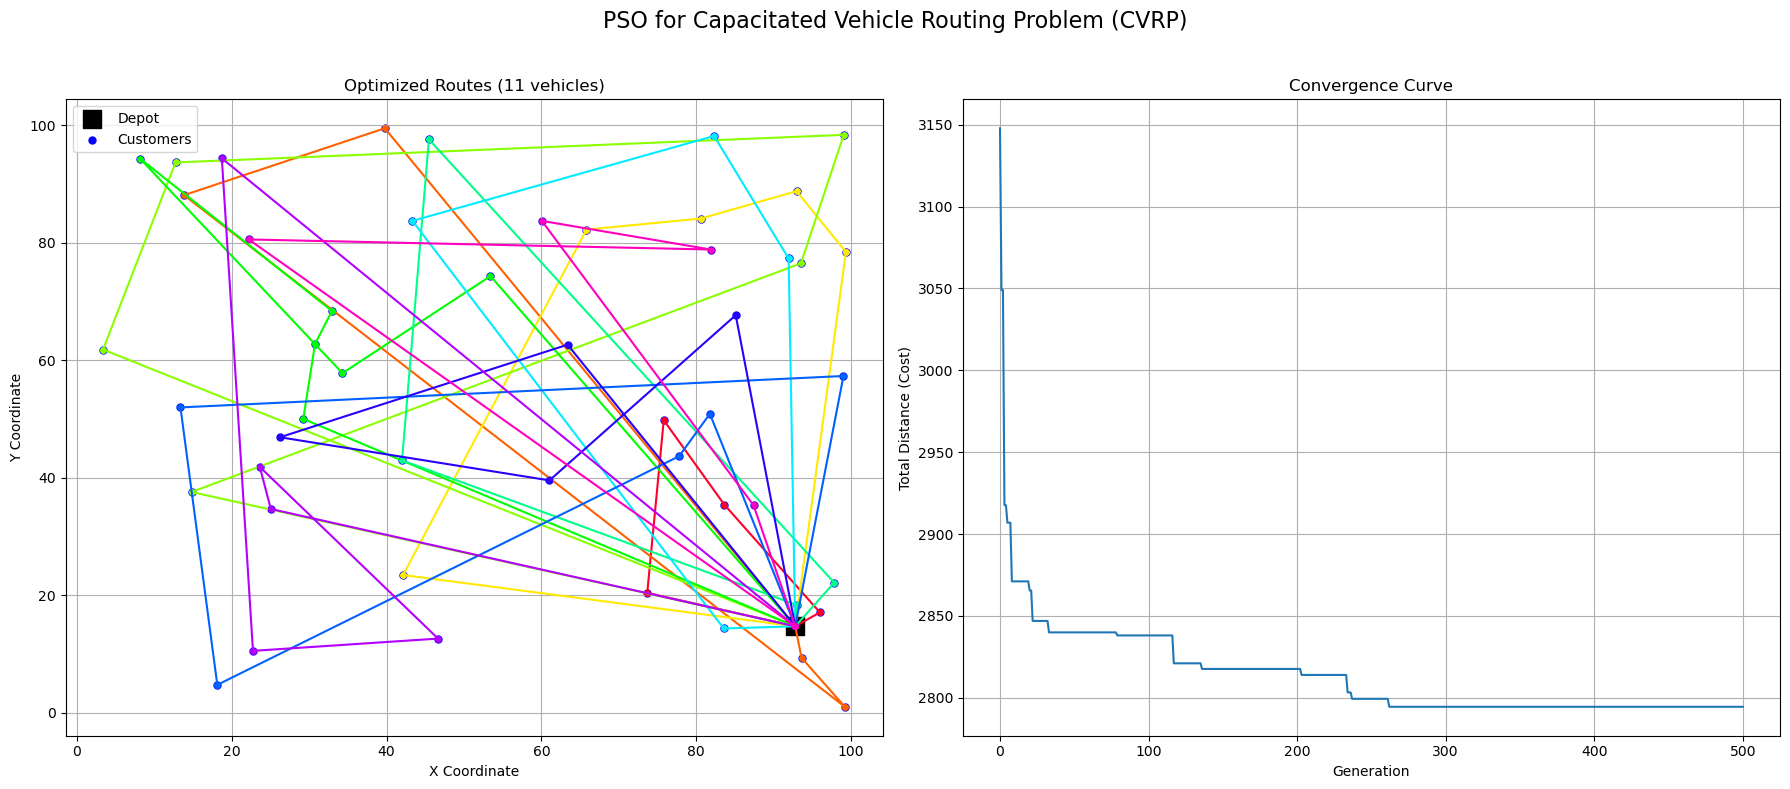


--- Final Solution ---
Total distance: 2794.47
Number of vehicles used: 11
  - Vehicle 1: Route = [np.int64(42), np.int64(17), np.int64(22), np.int64(33)], Total Demand = 81 (Capacity=100)
  - Vehicle 2: Route = [np.int64(47), np.int64(14), np.int64(41), np.int64(34)], Total Demand = 93 (Capacity=100)
  - Vehicle 3: Route = [np.int64(11), np.int64(32), np.int64(27), np.int64(23), np.int64(13)], Total Demand = 100 (Capacity=100)
  - Vehicle 4: Route = [np.int64(7), np.int64(29), np.int64(19), np.int64(20), np.int64(26)], Total Demand = 93 (Capacity=100)
  - Vehicle 5: Route = [np.int64(45), np.int64(21), np.int64(35), np.int64(40), np.int64(43), np.int64(46)], Total Demand = 100 (Capacity=100)
  - Vehicle 6: Route = [np.int64(49), np.int64(50), np.int64(24), np.int64(12)], Total Demand = 94 (Capacity=100)
  - Vehicle 7: Route = [np.int64(38), np.int64(8), np.int64(39), np.int64(4)], Total Demand = 95 (Capacity=100)
  - Vehicle 8: Route = [np.int64(15), np.int64(9), np.int64(6), np.int6

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- 1. CVRP 问题定义 ---
NUM_CUSTOMERS = 50
VEHICLE_CAPACITY = 100
NUM_VEHICLES = 10  # 假设有足够多的车辆

# 随机生成仓库和客户点
# 第一个点(index=0)是仓库
points = np.random.rand(NUM_CUSTOMERS + 1, 2) * 100
depot = points[0]
customers = points[1:]

# 随机生成客户需求
demands = np.random.randint(10, 30, size=NUM_CUSTOMERS)

# --- 2. PSO 超参数 ---
POP_SIZE = 50 # 粒子数量
MAX_GEN = 500 # 最大迭代次数
W = 0.8  # 惯性权重
C1 = 2.0  # 认知学习因子
C2 = 2.0  # 社会学习因子

# --- 3. 核心函数 ---
def calculate_distance(p1, p2):
    """计算两点间的欧氏距离"""
    return np.linalg.norm(p1 - p2)

def decode_position_to_routes(position, demands, capacity):
    """将粒子的位置向量解码为车辆路径"""
    # 按照position的值对客户索引进行排序，得到访问优先级
    customer_indices = np.argsort(position)
    
    routes = []
    current_route = []
    current_load = 0
    
    for customer_idx in customer_indices:
        demand = demands[customer_idx]
        if current_load + demand <= capacity:
            current_route.append(customer_idx)
            current_load += demand
        else:
            if current_route:
                routes.append(current_route)
            current_route = [customer_idx]
            current_load = demand
            
    if current_route:
        routes.append(current_route)
        
    return routes

def calculate_total_cost(routes, depot, customers):
    """计算所有路径的总距离"""
    total_distance = 0
    for route in routes:
        # 每条路径从仓库开始
        current_pos = depot
        # 依次访问路径中的客户
        for customer_idx in route:
            total_distance += calculate_distance(current_pos, customers[customer_idx])
            current_pos = customers[customer_idx]
        # 最后返回仓库
        total_distance += calculate_distance(current_pos, depot)
    return total_distance

class Particle:
    def __init__(self, num_customers):
        self.position = np.random.rand(num_customers)
        self.velocity = np.random.rand(num_customers) * 0.1
        self.pbest_position = self.position.copy()
        
        routes = decode_position_to_routes(self.position, demands, VEHICLE_CAPACITY)
        self.cost = calculate_total_cost(routes, depot, customers)
        self.pbest_cost = self.cost

def pso_cvrp():
    # --- 初始化 ---
    particles = [Particle(NUM_CUSTOMERS) for _ in range(POP_SIZE)]
    
    gbest_position = None
    gbest_cost = float('inf')
    
    # 初始化gbest
    for p in particles:
        if p.pbest_cost < gbest_cost:
            gbest_cost = p.pbest_cost
            gbest_position = p.pbest_position.copy()
            
    cost_history = [gbest_cost]
    print(f"Generation 0, Best Cost: {gbest_cost:.2f}")

    # --- 迭代 ---
    for gen in range(MAX_GEN):
        for p in particles:
            # 更新速度
            r1, r2 = np.random.rand(2)
            p.velocity = (W * p.velocity +
                          C1 * r1 * (p.pbest_position - p.position) +
                          C2 * r2 * (gbest_position - p.position))
            
            # 更新位置
            p.position += p.velocity
            
            # 解码并计算成本
            routes = decode_position_to_routes(p.position, demands, VEHICLE_CAPACITY)
            p.cost = calculate_total_cost(routes, depot, customers)
            
            # 更新pbest
            if p.cost < p.pbest_cost:
                p.pbest_cost = p.cost
                p.pbest_position = p.position.copy()
                
                # 更新gbest
                if p.pbest_cost < gbest_cost:
                    gbest_cost = p.pbest_cost
                    gbest_position = p.pbest_position.copy()
        
        cost_history.append(gbest_cost)
        if (gen + 1) % 10 == 0:
            print(f"Generation {gen+1}, Best Cost: {gbest_cost:.2f}")
            
    return gbest_position, cost_history

# --- 运行算法并可视化 ---
best_position, cost_history = pso_cvrp()
final_routes = decode_position_to_routes(best_position, demands, VEHICLE_CAPACITY)

# 绘制结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('PSO for Capacitated Vehicle Routing Problem (CVRP)', fontsize=16)

# 图1：最优路径图
ax1.scatter(depot[0], depot[1], c='black', s=150, marker='s', label='Depot')
ax1.scatter(customers[:, 0], customers[:, 1], c='blue', s=25, label='Customers')

colors = plt.cm.get_cmap('gist_rainbow', len(final_routes))
for i, route in enumerate(final_routes):
    route_points = np.array([depot] + [customers[j] for j in route] + [depot])
    ax1.plot(route_points[:, 0], route_points[:, 1], color=colors(i), marker='o', markersize=4, linestyle='-')

ax1.set_title(f'Optimized Routes ({len(final_routes)} vehicles)')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax1.legend()
ax1.grid(True)

# 图2：成本收敛曲线
ax2.plot(cost_history)
ax2.set_title('Convergence Curve')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Total Distance (Cost)')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n--- Final Solution ---")
print(f"Total distance: {cost_history[-1]:.2f}")
print(f"Number of vehicles used: {len(final_routes)}")
for i, route in enumerate(final_routes):
    route_demands = [demands[j] for j in route]
    total_demand = sum(route_demands)
    print(f"  - Vehicle {i+1}: Route = {list(np.array(route)+1)}, Total Demand = {total_demand} (Capacity={VEHICLE_CAPACITY})")

好的，我们来详细拆解一下上面那个用粒子群算法（PSO）解决带容量约束车辆路径问题（CVRP）的代码，解释清楚每一步背后的逻辑和原理。

---

### 核心挑战：如何让“鸟”去规划“送货路线”？

标准PSO中的粒子是在一个连续的多维空间中飞行的，它的“位置”就是一组坐标值（比如 `[2.5, -1.3, 5.8]`）。而CVRP问题的解是一组离散的、有先后顺序的、还要满足容量限制的送货路线。

这两者之间存在巨大的鸿沟。我们解决这个问题的核心思想，就是搭建一座桥梁，让粒子的连续“位置”能够被翻译（解码）成一组离散的“送货路线”。

### 第一部分：搭建桥梁 —— 编码与解码 (Encoding & Decoding)

**1. 编码 (Encoding): 如何用粒子的位置表示一个解？**

我们采用了一种非常巧妙的间接编码方法，叫做**随机键编码 (Random-Key Encoding)**。

*   **粒子的位置 (`position`)**: 我们让每个粒子的 `position` 是一个长度等于客户数量（`NUM_CUSTOMERS`）的一维数组。数组里的每个元素都是一个浮点数。
    *   例如，如果有5个客户，一个粒子的 `position` 可能就是 `[0.78, -1.21, 2.54, 0.11, -0.45]`。
*   **这个数组的含义**: 这个数组本身不直接代表路径，而是代表了每个客户被服务的**优先级 (Priority)**。数值越大的客户，优先级越高。

**2. 解码 (Decoding): 如何把“优先级”翻译成“送货路线”？**

这是整个算法最关键的部分，由 `decode_position_to_routes` 函数实现。这个过程分为两步：

**步骤 A: 确定全局访问顺序**

*   我们使用 `np.argsort(position)` 函数。这个函数不会对 `position` 数组本身排序，而是返回一个索引数组，这个索引数组指明了如果对 `position` 排序，元素应该在什么位置。
*   **示例**:
    *   `position` = `[0.78, -1.21, 2.54, 0.11, -0.45]`
    *   这个数组分别对应客户 `C0, C1, C2, C3, C4`。
    *   排序后的大小关系是 `C2 > C0 > C3 > C4 > C1`。
    *   所以 `np.argsort()` 会返回一个客户索引的序列：`[2, 0, 3, 4, 1]` (因为 C2=2.54最大，C0=0.78其次，...，C1=-1.21最小)。
*   **结果**: 我们得到了一个**全局客户访问优先级列表**。这就是我们接下来构建具体路线的基础。

**步骤 B: 贪心构建路线 (Greedy Route Construction)**

*   现在我们有了客户的访问顺序 `[2, 0, 3, 4, 1]`。我们模拟一个调度员来安排车辆。
*   **启动第一辆车 (Vehicle 1)**:
    1.  拿起优先级最高的客户 `C2`，检查它的需求量。假设需求是 40。当前车辆载重 `40 <= 100` (车辆容量)，可以装。
        *   Vehicle 1 路线: `[2]`, 载重: `40`
    2.  拿起下一个客户 `C0`，需求量 30。检查 `40 + 30 <= 100`，可以装。
        *   Vehicle 1 路线: `[2, 0]`, 载重: `70`
    3.  拿起下一个客户 `C3`，需求量 25。检查 `70 + 25 <= 100`，可以装。
        *   Vehicle 1 路线: `[2, 0, 3]`, 载重: `95`
    4.  拿起下一个客户 `C4`，需求量 15。检查 `95 + 15 > 100`，**超载了！** 所以客户 `C4` 不能由 Vehicle 1 服务。
*   **启动第二辆车 (Vehicle 2)**:
    1.  Vehicle 1 的路线已经确定为 `[2, 0, 3]`。我们现在开始为 Vehicle 2 分配客户，从刚才被拒绝的 `C4` 开始。
    2.  拿起客户 `C4`，需求量 15。`15 <= 100`，可以装。
        *   Vehicle 2 路线: `[4]`, 载重: `15`
    3.  拿起最后一个客户 `C1`，需求量 20。`15 + 20 <= 100`，可以装。
        *   Vehicle 2 路线: `[4, 1]`, 载重: `35`
*   **解码完成**: 最终，我们从一个简单的 `position` 向量 `[0.78, -1.21, 2.54, 0.11, -0.45]` 成功解码出了一套完整的、满足所有约束的送货方案：
    *   车1路线: `Depot -> C2 -> C0 -> C3 -> Depot`
    *   车2路线: `Depot -> C4 -> C1 -> Depot`

**这座“桥梁”的意义**: 任何一个连续的 `position` 向量都能被确定性地、唯一地映射到一个合法的CVRP解。这使得我们可以在连续空间中使用PSO，而算法的评估则在离散的解空间中进行。

---

### 第二部分：评估解的质量 —— 适应度函数

*   **函数**: `calculate_total_cost`
*   **目的**: 计算解码后得到的所有车辆路径的总行驶距离。
*   **逻辑**:
    1.  对于每一条路线（例如 `[2, 0, 3]`）：
    2.  计算 `Distance(Depot, C2)`
    3.  加上 `Distance(C2, C0)`
    4.  加上 `Distance(C0, C3)`
    5.  最后加上 `Distance(C3, Depot)`，因为车要开回仓库。
    6.  把所有车辆路线的距离加起来，就是这个解的总成本（Cost）。
*   **目标**: 我们的目标是让这个 `total_cost` 越小越好。在PSO中，`cost` 越小，代表粒子的适应度越高。

---

### 第三部分：PSO的进化过程 —— 粒子如何“飞翔”

现在我们有了“桥梁”和“评估标准”，PSO的核心迭代过程就可以开始了。

**1. 初始化 (`Particle` 类和 `pso_cvrp` 的开头)**

*   创建一群粒子（`POP_SIZE` 个）。
*   每个粒子的 `position` (优先级列表) 和 `velocity` (优先级的变化趋势) 都是随机的。
*   对每个粒子，我们立即进行**解码**和**评估**，计算出它的初始 `cost`。
*   **pbest (个体最优)**: 每个粒子记住自己诞生时的位置和成本，作为它自己的历史最好成绩。
*   **gbest (全局最优)**: 从所有粒子的 `pbest` 中，挑出成本最低的那个，作为整个群体的历史最好成绩。

**2. 核心迭代 (主 `for` 循环)**

对于每一代 (generation) 中的每一个粒子，我们执行以下操作：

*   **更新速度 (`p.velocity = ...`)**:
    *   这是标准PSO公式。粒子的新速度由三部分决定：
        1.  `W * p.velocity`: **惯性**。保持自己原来的“飞行”趋势。
        2.  `C1 * r1 * (p.pbest_position - p.position)`: **自我认知**。有一个力把它拉向它自己历史最好的位置。
        3.  `C2 * r2 * (gbest_position - p.position)`: **社会学习**。有一个更强的力把它拉向整个群体发现的最好位置。
    *   这个速度向量代表了每个客户优先级的“变化量”。

*   **更新位置 (`p.position += p.velocity`)**:
    *   将速度的变化应用到当前位置上。
    *   `position` 向量中的浮点数值发生了改变。这意味着客户之间的相对优先级发生了变化。

*   **重新评估**:
    *   用新的 `position`，我们再次调用 `decode_position_to_routes` 和 `calculate_total_cost`，得到一个全新的路径方案和总成本。

*   **更新 pbest 和 gbest**:
    *   如果新方案的总成本比粒子自己的 `pbest_cost` 还低，那么就更新它的 `pbest`。
    *   如果这个新方案的总成本比整个群体的 `gbest_cost` 还低，那么就更新 `gbest`。

**这个过程不断重复：** 粒子们在连续的“优先级空间”中飞行，每次飞行后，我们都把它降落到“现实世界”中（解码成路径），评估一下好坏，然后根据评估结果和群体智慧，决定下一次该往哪里飞。

---

### 总结

这个算法的精髓在于：

1.  **解耦**: 将复杂的、离散的、带约束的组合优化问题，通过**编码/解码**机制，与简单的、连续空间的PSO搜索算法分离开来。
2.  **引导式搜索**: PSO并没有盲目地去组合路径。它通过调整一个更抽象的“优先级”列表，来间接地、智能地引导路径的生成。当一个粒子发现一个好的优先级组合（即解码后成本很低），这个“好信息” (`gbest_position`) 就会通过社会学习机制迅速传播给其他粒子，引导整个群体朝这个有希望的方向去探索。

最终，经过多代迭代，所有粒子都会聚集在“优先级空间”中的一个很小的区域内，这个区域对应的 `position` 向量在解码后，能够产生一个成本非常低（接近最优）的车辆路径方案。